## HOMEWORK WEEK 6

In [1]:
# libraries imports

import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error

from sklearn.tree import export_text
%matplotlib inline


In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_subset = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]
df_subset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [4]:
df_subset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [6]:
# List of function use for homework

def prepare_data_split(df, test_size, random_state, target_feature):
    '''
    Fuunction Split a dataset(df) in the ratio 60%/20%/20% == Train/Validation/Test
    
    return the train, Validation and Test dataset with their corresponding targer variable
    
    Note: the function does not remove the target feature
    '''
    df_full_train, df_test = train_test_split(df, test_size= test_size, random_state=random_state)
    df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=random_state)
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train[target_feature].values
    y_val = df_val[target_feature].values
    y_test = df_test[target_feature].values
    
    print(f"Length of Train: {len(df_train)}, Length of Validation: {len(df_val)}, Length of Test: {len(df_test)}")
    print()
    return df_train, y_train, df_val, y_val, df_test, y_test, df_full_train


In [7]:
# SETUP VALIDATION FRAMEWORK

test_size = 0.2
random_state = 1
target_feature = "median_house_value"

df_train, y_train, df_val, y_val, df_test, y_test, df_full_train = prepare_data_split(df_subset, 
                                                                                      test_size,
                                                                                      random_state,
                                                                                      target_feature)

print("Train")
display(df_train.head())
print()
print("Validation")
display(df_val.head())
print()
print("Test")
display(df_test.head())
print()
print("Full_train")
display(df_full_train.head())


Length of Train: 9411, Length of Validation: 3138, Length of Test: 3138

Train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,134100.0,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,321800.0,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,110400.0,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,168200.0,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,156600.0,<1H OCEAN



Validation


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.74,38.48,12.0,4174.0,670.0,1882.0,647.0,4.5510,178300.0,<1H OCEAN
1,-121.67,36.93,22.0,569.0,132.0,542.0,125.0,2.1875,187500.0,<1H OCEAN
2,-120.90,39.95,20.0,1349.0,238.0,601.0,203.0,3.5417,96600.0,INLAND
3,-118.14,34.02,44.0,1715.0,460.0,1740.0,423.0,2.7019,153300.0,<1H OCEAN
4,-118.11,33.80,36.0,1837.0,319.0,810.0,305.0,4.3897,235000.0,<1H OCEAN



Test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.02,37.32,27.0,4336.0,754.0,2009.0,734.0,6.3923,348300.0,<1H OCEAN
1,-121.32,37.97,43.0,2453.0,490.0,1093.0,438.0,2.9107,88800.0,INLAND
2,-115.37,32.81,23.0,1458.0,294.0,866.0,275.0,2.3594,74300.0,INLAND
3,-118.02,34.08,31.0,2402.0,632.0,2830.0,603.0,2.3333,164200.0,INLAND
4,-120.50,37.30,29.0,1572.0,456.0,1697.0,429.0,1.7600,63200.0,INLAND



Full_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13673,-117.25,34.04,18.0,5761.0,1063.0,2763.0,1058.0,4.4472,161100.0,INLAND
6611,-118.11,34.18,52.0,3571.0,510.0,1434.0,490.0,5.9009,376000.0,INLAND
2649,-124.10,40.50,42.0,2380.0,553.0,1300.0,504.0,1.7574,57500.0,<1H OCEAN
6789,-118.16,34.09,52.0,1722.0,448.0,1122.0,425.0,3.1204,224000.0,<1H OCEAN
3826,-118.45,34.20,18.0,2729.0,800.0,2099.0,742.0,2.5842,230800.0,<1H OCEAN


In [8]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [9]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [10]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse = True)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.fillna(0).to_dict(orient='records')

X_val = dv.transform(val_dicts)

In [11]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [12]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [40]:
# Q1 == Which feature is used for splitting the data? = >> ANS = ocean_proximity

In [13]:
# Q2

rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("RMSE: ", rmse)

RMSE:  0.24527740463893763


In [ ]:
# Q2 What's the RMSE of this model on validation? ANS == 0.245

In [14]:
# Q3

scores = []

for n in range(10, 201, 10):
    rf_model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_val)

    # Evaluate the model
    mse = mean_squared_error(y_val, y_pred)

    scores.append((n, np.sqrt(mse)))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores.head()

,n_estimators,rmse
0,10,0.245277
1,20,0.239041
2,30,0.236995
3,40,0.235509
4,50,0.235021


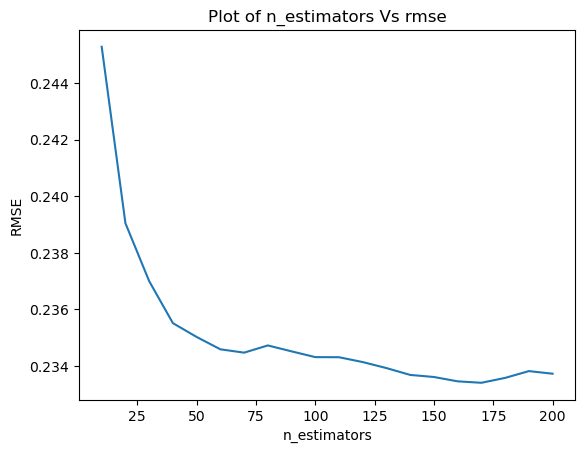

In [15]:
#plot 

plt.plot(df_scores.n_estimators, df_scores.rmse)

plt.xlabel("n_estimators")
plt.title("Plot of n_estimators Vs rmse")
plt.ylabel("RMSE");

In [ ]:
# Q3 After which value of n_estimators does RMSE stop improving? ANS == 50

# 160 is another n_estimator with a marginal reduction in RMSE, an improvement which is computationally insignificant.

In [17]:
# Q4

mean_rmse = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rmse_scores = []
        rf = RandomForestRegressor(n_estimators=n, random_state=1, max_depth=d, n_jobs=-1)

        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)

        # Evaluate the model
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        rmse_scores.append(rmse)
    avg_rmse = sum(rmse_scores) / len(rmse_scores)
    mean_rmse.append((d, avg_rmse))
    
    
df_scores = pd.DataFrame(mean_rmse, columns = ['max_depth', 'mean_rmse'])
display(df_scores)

f_list  = list(df_scores.mean_rmse)
idx = f_list.index(min(f_list))
print()
print(f"Best Mean rmse: {round(df_scores.mean_rmse[idx], 3)}, with Max_depth of: {df_scores.max_depth[idx]}")

,max_depth,mean_rmse
0,10,0.244773
1,15,0.234596
2,20,0.233925
3,25,0.233740



Best Mean rmse: 0.234, with Max_depth of: 25


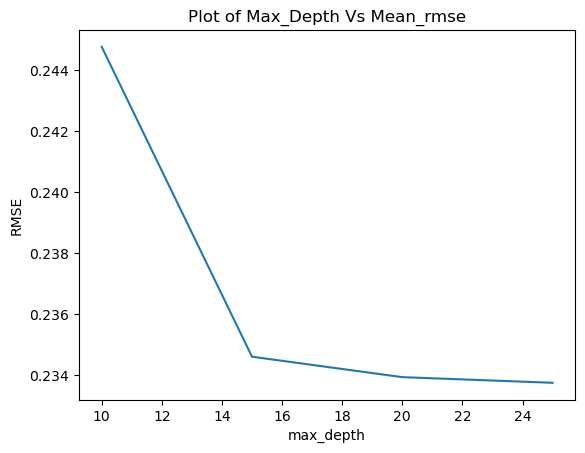

In [18]:
#plot 

plt.plot(df_scores.max_depth, df_scores.mean_rmse)

plt.xlabel("max_depth")
plt.title("Plot of Max_Depth Vs Mean_rmse")
plt.ylabel("RMSE");

In [ ]:
# Q4 What's the best max_depth, using the mean RMSE? ANS== 25

In [17]:
# Q5

rf = RandomForestRegressor(n_estimators=10, random_state=1, max_depth = 20, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [19]:
# Access feature importances
feature_importances = rf.feature_importances_

feature_names=dv.get_feature_names_out()
feat_imp = pd.Series(feature_importances, index = feature_names)
feat_imp

households                   0.015136
housing_median_age           0.030317
latitude                     0.102007
longitude                    0.086244
median_income                0.335611
ocean_proximity=<1H OCEAN    0.292473
ocean_proximity=INLAND       0.073806
population                   0.027136
total_bedrooms               0.015852
total_rooms                  0.021417
dtype: float64

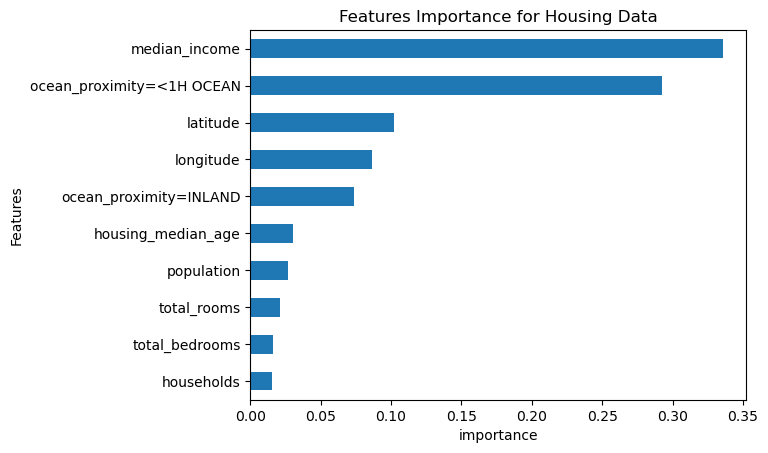

In [21]:
# Bar chart of importance of each feature to the prediction

feat_imp.sort_values().plot(kind = "barh")

plt.xlabel("importance")
plt.ylabel("Features")
plt.title("Features Importance for Housing Data");

In [ ]:
# Q5 What's the most important feature (among these 4)? ANS == median income

In [17]:
# Q6-1

features = dv.get_feature_names_out()
features = features.tolist()

# Clean up feature names to remove invalid characters
cleaned_features = [name.replace("[", "").replace("]", "")
                    .replace("<", "").replace(">", "").replace(" ", "_") for name in features]

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=cleaned_features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=cleaned_features)

In [18]:
# Create Watchlist

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [57]:
#Q6-2

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [58]:
scores = {}

In [62]:
%%capture output

xgb_params = {
        'eta': 0.1, 
        'max_depth': 6,
        'min_child_weight': 1,

        'objective': 'reg:squarederror',
        'nthread': 8,

        'seed': 1,
        'verbosity': 1,
    }
model = xgb.train(xgb_params, dtrain, 
                      num_boost_round=100,
                      evals=watchlist)


In [63]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [64]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1'])

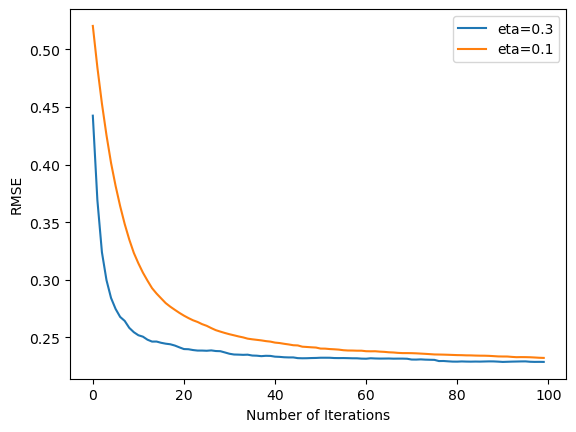

In [67]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)

plt.xlabel("Number of Iterations")
plt.ylabel("RMSE")
plt.legend();

In [ ]:
# Q6 Which eta leads to the best RMSE score on the validation dataset? ANS= 0.3